<a href="https://colab.research.google.com/github/AjitPandey-4/fashion-mnist-mlops/blob/main/fashion_mnist_mlops_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

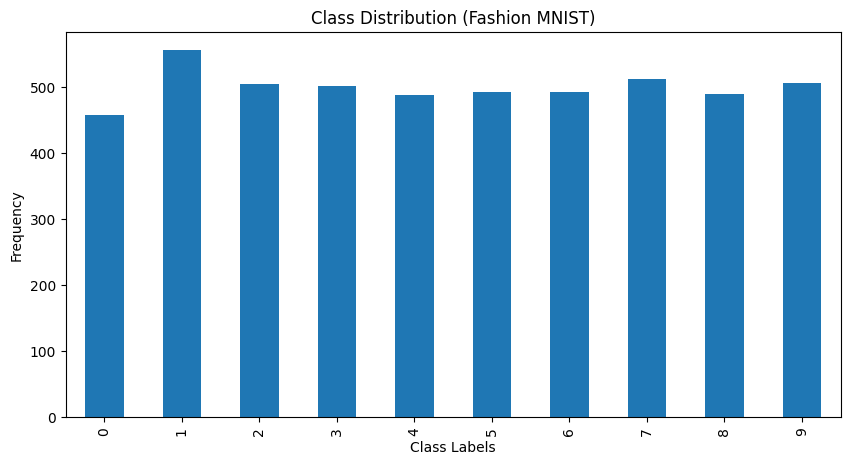

Total Missing Values: 0


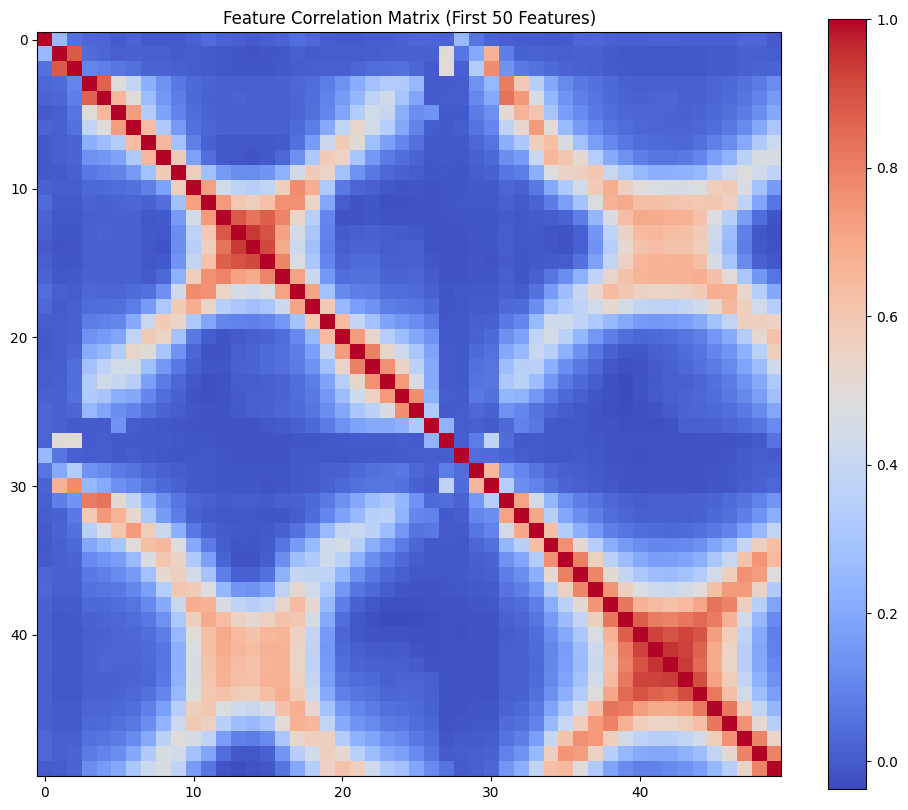

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data (subset for fast execution)
subset_size = 5000
(x_train, y_train), (_, _) = fashion_mnist.load_data()
x_train_small = x_train[:subset_size].reshape(subset_size, -1)
df_small = pd.DataFrame(x_train_small)
df_small['label'] = y_train[:subset_size]

# Class distribution plot
plt.figure(figsize=(10,5))
df_small['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution (Fashion MNIST)')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

# Check for missing values (simple and clear)
missing_values = df_small.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")

# Correlation matrix (simplified)
corr_matrix = df_small.iloc[:, :50].corr()  # only first 50 features to save memory
plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.title('Feature Correlation Matrix (First 50 Features)')
plt.colorbar()
plt.show()


In [5]:
!pip install shap

In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load subset of dataset
subset_size = 5000
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train_small = x_train[:subset_size].reshape(subset_size, -1)
x_test_small = x_test[:1000].reshape(1000, -1)

# Standard Scaling clearly
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_small)
x_test_scaled = scaler.transform(x_test_small)

print("Feature Engineering (Scaling) completed successfully.")

Feature Engineering (Scaling) completed successfully.


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train a simple Random Forest Classifier clearly
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(x_train_scaled, y_train[:subset_size])

print("Random Forest trained successfully.")


Random Forest trained successfully.


<Figure size 640x480 with 0 Axes>

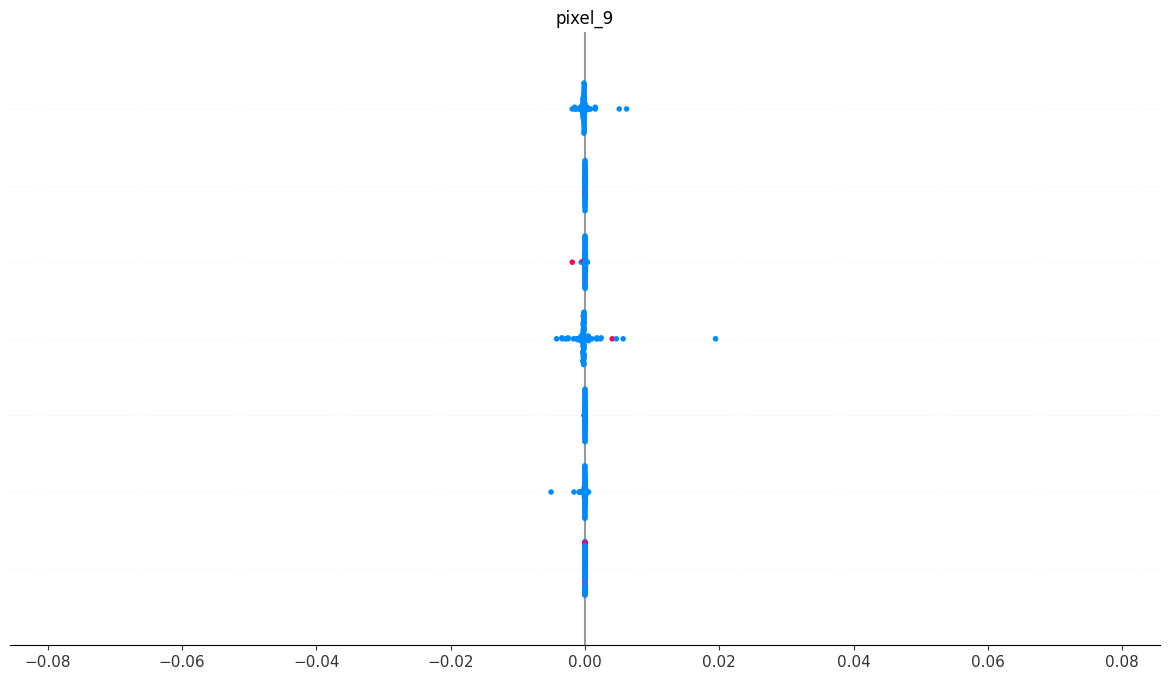

In [9]:
import shap

# Create SHAP explainer clearly
explainer = shap.TreeExplainer(model)

# Compute SHAP values (clearly on smaller subset for speed)
shap_values = explainer.shap_values(x_test_scaled[:100])

# SHAP summary plot clearly
shap.summary_plot(shap_values, features=x_test_scaled[:100], feature_names=[f'pixel_{i}' for i in range(x_test_scaled.shape[1])])


In [10]:
# Verify feature scaling explicitly
print("Scaled Feature Mean (approx.):", np.mean(x_train_scaled))
print("Scaled Feature Std Dev (approx.):", np.std(x_train_scaled))


Scaled Feature Mean (approx.): 6.365882877524163e-18
Scaled Feature Std Dev (approx.): 0.9999999999999988


Installation

In [15]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=21e048712d731248e0ac698969dd13d79799e8f7b994e168a9332cca6301f7b1
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o


H2O AutoML

In [16]:
import h2o
from h2o.automl import H2OAutoML
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd

# Initialize H2O explicitly
h2o.init()

# Data preparation (explicitly subsetted for fast execution)
subset_size = 3000
(x_train, y_train), (_, _) = fashion_mnist.load_data()
x_train_flat = x_train[:subset_size].reshape(subset_size, -1)
df = pd.DataFrame(x_train_flat)
df['label'] = y_train[:subset_size]

# Convert Pandas DataFrame to H2OFrame explicitly
train_h2o = h2o.H2OFrame(df)

# Define features and target explicitly
x_cols = train_h2o.columns[:-1]  # all columns except label
y_col = 'label'
train_h2o[y_col] = train_h2o[y_col].asfactor()

# Run H2O AutoML explicitly
aml = H2OAutoML(max_runtime_secs=300, seed=42)  # 5 mins clearly
aml.train(x=x_cols, y=y_col, training_frame=train_h2o)

# View leaderboard explicitly
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

# Display the best model explicitly
best_model = aml.leader
print("\nBest model clearly selected by AutoML (H2O):")
print(best_model)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5vm91r_e
  JVM stdout: /tmp/tmp5vm91r_e/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5vm91r_e/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 21 days
H2O_cluster_name:,H2O_from_python_unknownUser_hdab99
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
09:54:07.958: _train param, Dropping bad and constant columns: [0]

███
09:54:18.123: _train param, Dropping bad and constant columns: [0]

████████████████████████
09:56:14.343: _train param, Dropping bad and constant columns: [0]

████████████████████████
09:58:10.940: _train param, Dropping unused columns: [0]

██████
09:58:38.850: _train param, Dropping bad and constant columns: [0]

█
09:58:43.378: _train param, Dropping bad and constant columns: [0]


09:58:47.979: _train param, Dropping bad and constant columns: [0]

█
09:58:52.787: _train param, Dropping bad and constant columns: [0]

█
09:58:57.299: _train param, Dropping bad and constant columns: [0]

█
09:59:01.785: _train param, Dropping unused columns: [0]

█
09:59:04.475: _train param, Dropping unused columns: [0]

█| (done) 100%
model_id                                                  mean_per_class_error   

#M4

In [17]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.0/681.0 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.3 MB/s eta 0:00:00


Tracking matrices

In [18]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

mlflow.set_experiment("Fashion MNIST Model Monitoring")

with mlflow.start_run():
    # Data preparation explicitly
    subset_size = 2000
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train_flat = x_train[:subset_size].reshape(subset_size, -1)
    y_train_subset = y_train[:subset_size]
    x_test_flat = x_test[:500].reshape(500, -1)
    y_test_subset = y_test[:500]

    # Scaling explicitly
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train_flat)
    x_test_scaled = scaler.transform(x_test_flat)

    # Model explicitly
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(x_train_scaled, y_train_subset)

    # Predictions explicitly
    preds = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test_subset, preds)

    # Logging explicitly
    mlflow.log_param("n_estimators", 50)
    mlflow.log_metric("accuracy", accuracy)

    print(f"Tracked accuracy explicitly in MLflow: {accuracy:.4f}")


2025/03/23 11:09:46 INFO mlflow.tracking.fluent: Experiment with name 'Fashion MNIST Model Monitoring' does not exist. Creating a new experiment.


Tracked accuracy explicitly in MLflow: 0.8340


Implementing drift detection

In [19]:
# Simple Data Drift Detection explicitly
import numpy as np

# Simulating drift detection explicitly
train_mean = np.mean(x_train_scaled)
test_mean = np.mean(x_test_scaled)

drift_detected = abs(train_mean - test_mean) > 0.1  # threshold example
print(f"Data Drift Detected explicitly: {drift_detected}")


Data Drift Detected explicitly: False
